<a href="https://colab.research.google.com/github/Alonge9500/Alonge9500/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Dataset Classification


### About the Dataset

* The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3]

* The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

* Fisher's paper was published in the Annals of Eugenics and includes discussion of the contained techniques' applications to the field of phrenology.[1] This history has led some to suggest discontinuing use of the Iris dataset for teaching statistical techniques today and replacing it with less-controversial alternatives.


* ...............                ***Source Wikipedia***

### About the project

* Source of data : The dataset use for this project is source from kaggle

* In the project a bit of analysis and visualization shall be carried out in the project

* The first section of model building shall invoves the building of a model with the K nearest neighbor algorithn using sklearn library

* while the second part of the algorithmn will utilize neural network using the tensor flow library

In [ ]:
# Importing the requrired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the iris dataset
iris_data = pd.read_csv('IRIS.csv')


In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


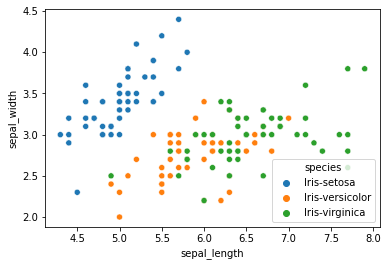

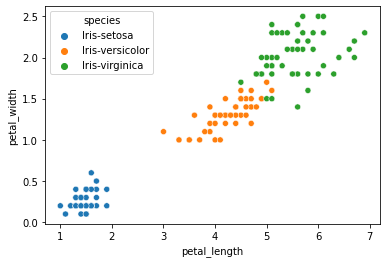

In [ ]:
# Visualizing the Data set
sns.scatterplot(data= iris_data, x='sepal_length',y='sepal_width',hue='species')
plt.show()

sns.scatterplot(data= iris_data, x='petal_length',y='petal_width',hue='species')

plt.show()

* The second plot (Betwee the petal_width and petal_length) shows the variations between species of flowers base on the length and width of their petals

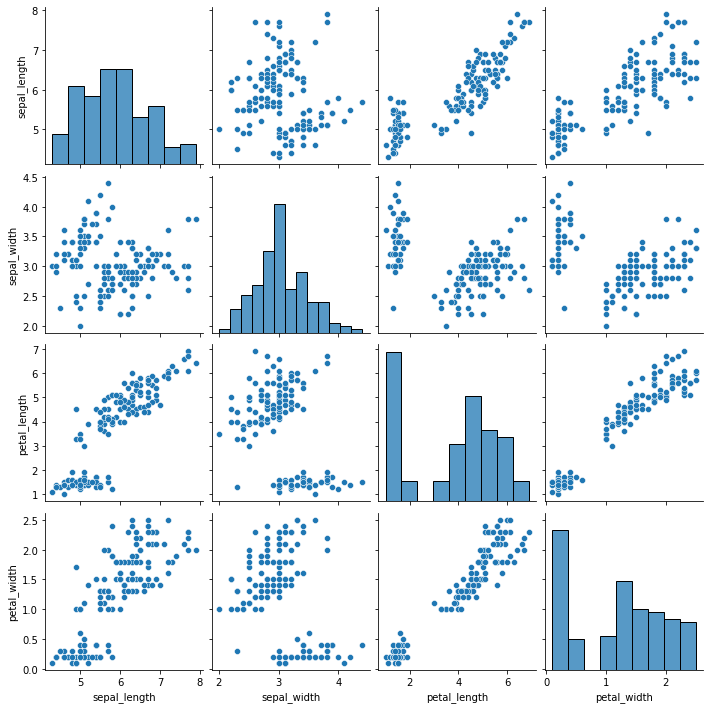

In [ ]:
# Iris Dataset pair plot
sns.pairplot(data=iris_data)

* Further details of the plot can be seen in the Pairplot above.

## Data Preprocessing

* converting the species column into numerical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer


In [ ]:
encoder = LabelEncoder()
features = np.array(iris_data.drop('species',axis=1))
labels = iris_data.species

labels = encoder.fit_transform(labels)
transformer = Normalizer().fit(features)
features = transformer.transform(features)


### Splitting Data
* Split data into 80% for training set and 20% for test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
feature_train, feature_test, label_train, label_test = train_test_split(features, labels, test_size=0.20, random_state=42)

# Creating Classification model

* Create a classification model using knn algorithmn (Sklearn)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
k_list =range(1,10)
scores = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(feature_train,label_train)
  score = knn.score(feature_test,label_test)
  scores.append(score*100)

print(max(scores))

100.0


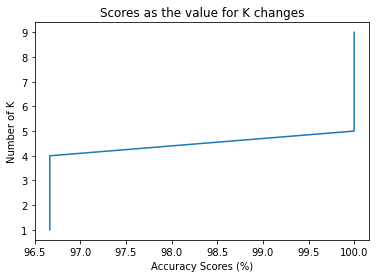

In [ ]:
plt.plot(scores,k_list)
plt.title('Scores as the value for K changes')
plt.xlabel('Accuracy Scores (%)')
plt.ylabel('Number of K')

plt.show()

## Implementing the model using neural network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential,Input

In [ ]:
print(feature_train.shape)
tf.keras.Input(shape=(16,))

(120, 4)


<KerasTensor: shape=(None, 16) dtype=float32 (created by layer 'input_8')>

In [ ]:
tf.random.set_seed(100)

model = Sequential([
    Input(shape=(4,)),
    layers.Dense(units=128,activation='relu',name='layer1'),
    layers.Dense(units=64,activation='relu',name='layer2'),
    layers.Dense(units=32,activation='relu',name='layer3'),
    layers.Dense(units=16,activation='relu',name='layer4'),
    layers.Dense(units=3,activation='linear',name='output')
])


model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(feature_train,label_train,
          epochs=100,
          batch_size = 10)


Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 1.0769 - accuracy: 0.5333
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0263 - accuracy: 0.6583
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.9612 - accuracy: 0.6583
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8693 - accuracy: 0.6583
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7533 - accuracy: 0.6583
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.6667
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5451 - accuracy: 0.7000
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.8333
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8750
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3833 - accuracy: 0.9083
Epoch 11/

In [ ]:
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               640       
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 layer3 (Dense)              (None, 32)                2080      
                                                                 
 layer4 (Dense)              (None, 16)                528       
                                                                 
 output (Dense)              (None, 3)                 51        
                                                                 
Total params: 11,555
Trainable params: 11,555
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score = model.evaluate(feature_test, label_test, verbose=0)
print(score)

[0.11228752136230469, 0.9333333373069763]


### Conclusion
* After the completion of the two models the following was observe:
* The KNN algorithm gives an accuracy of 100% from K = 4 - 7
* The Neural network gives after trained for 80 epoch gives a final accuracy from the model evaluation of approximately 97%
* Limiting the report on the above result it could be assume that the KNN algorithm performs better than the Neural network on the classification of the Iris dataset

* Note: Insufficiency of Data, improper implementation, wrong parameters, inappropriate usage of layer and insufficiency of layers were not put into consideration in the above conclusion




## References

* Kaggle
* Wikepedia

Author : Alonge Daniel Oluwasegun

Linkedin : https://www.linkedin.com/in/alonge-daniel-27b4b4139/